In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ageinc_df=pd.read_csv('C:\\Users\mac\Desktop\数据分析班\week8\w3_ageinc.csv')

In [4]:
ageinc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  1000 non-null   int64
 1   age     1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [5]:
ageinc_df.describe()

,income,age
count,1000.00000,1000.000000
mean,80116.81800,39.410000
std,39262.33567,10.976811
min,0.00000,18.000000
25%,46402.25000,30.000000
50%,78993.50000,39.000000
75%,114810.50000,49.000000
max,179294.00000,63.000000


In [6]:
#（收入-收入均值）/收入标准差
ageinc_df['z_income']=(ageinc_df['income']-ageinc_df['income'].mean())/ageinc_df['income'].std()
#（年龄-年龄均值）/年龄标准差
ageinc_df['z_age']=(ageinc_df['age']-ageinc_df['age'].mean())/ageinc_df['age'].std()
# 查看数据分布
ageinc_df.describe()

,income,age,z_income,z_age
count,1000.00000,1000.000000,1.000000e+03,1.000000e+03
mean,80116.81800,39.410000,1.421085e-17,3.037570e-16
std,39262.33567,10.976811,1.000000e+00,1.000000e+00
min,0.00000,18.000000,-2.040552e+00,-1.950475e+00
25%,46402.25000,30.000000,-8.587000e-01,-8.572617e-01
50%,78993.50000,39.000000,-2.861058e-02,-3.735147e-02
75%,114810.50000,49.000000,8.836378e-01,8.736599e-01
max,179294.00000,63.000000,2.526013e+00,2.149076e+00


<AxesSubplot:xlabel='income', ylabel='age'>

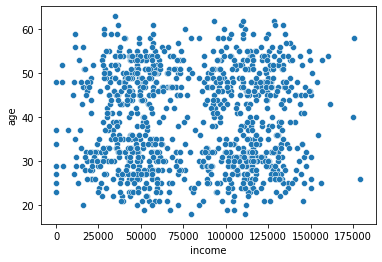

In [7]:
#初步数据可视化
sns.scatterplot(x='income',y='age',data=ageinc_df)

In [8]:
#导入sklearn中的cluster
from sklearn import cluster
#将群体分成3簇，并设定每次运行产生相同的随机数
model=cluster.KMeans(n_clusters=3,random_state=10)
#用标准化的收入与年龄拟合模型
model.fit(ageinc_df[['z_income','z_age']])

KMeans(n_clusters=3, random_state=10)

In [9]:
ageinc_df['cluster']=model.labels_
ageinc_df.head(50)

,income,age,z_income,z_age,cluster
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,2
2,36517,52,-1.110474,1.146963,0
3,33223,49,-1.194372,0.873660,0
4,72994,53,-0.181416,1.238064,0
5,38361,26,-1.063508,-1.221666,2
6,48579,29,-0.803259,-0.948363,2
7,115248,24,0.894781,-1.403869,1
8,11527,31,-1.746962,-0.766161,2
9,54096,51,-0.662742,1.055862,0


<AxesSubplot:xlabel='age', ylabel='income'>

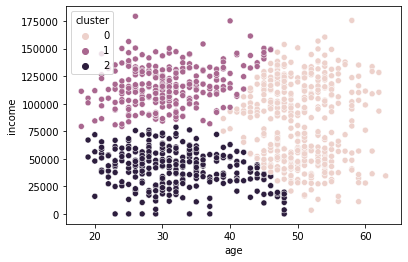

In [10]:
sns.scatterplot(x='age',y='income',hue='cluster',data=ageinc_df)

In [12]:
model1=cluster.KMeans(n_clusters=4,random_state=10)

In [13]:
model1.fit(ageinc_df[['z_income','z_age']])

KMeans(n_clusters=4, random_state=10)

In [15]:
ageinc_df['cluster1']=model1.labels_

<AxesSubplot:xlabel='age', ylabel='income'>

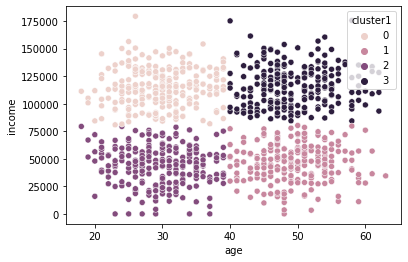

In [16]:
sns.scatterplot(x='age',y='income',hue='cluster1',data=ageinc_df)

In [17]:
ageinc_df.groupby(['cluster1'])['income'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster1,,,,,,,,
0,258.0,115210.709302,16802.768499,80820.0,104076.00,114943.5,127979.25,179294.0
1,256.0,46482.371094,16357.141893,0.0,35781.75,47520.0,57161.75,80243.0
2,248.0,43699.213710,17463.882999,0.0,31967.50,45212.5,56248.00,79360.0
3,238.0,116199.844538,18110.799585,84364.0,100752.25,115183.0,127515.25,175497.0


In [18]:
ageinc_df.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,422.0,50.362559,4.580120,39.0,47.0,50.0,54.0,63.0
1,283.0,30.749117,5.811821,18.0,26.5,30.0,34.0,46.0
2,295.0,32.050847,6.946403,19.0,27.0,31.0,36.0,48.0
